## Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.Файл доступен тут -https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:
1. satisfaction_level​ - Уровень удовлетворенности работой
2. Last_evaluation ​- Время с момента последней оценки в годах
3. number_projects​ - Количество проектов, выполненных за время работы
4. average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
5. time_spend_company​ - Стаж работы в компании в годах
6. work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left​ - уволился ли сотрудник
8. promotion_last_5years​ - повышался ли сотрудник за последние пять лет
9. department ​- отдел в котором работает сотрудник
10. salary​ - относительный уровень зарплаты

In [1]:
import pandas as pd

In [2]:
# 1. Загрузите файл HR.csv в pandas dataframe
df_hr = pd.read_csv('HR.csv')
df_hr.info()
df_hr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# 2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)
df_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
# Расчет моды
print('MODE:')
for i in df_hr.columns:
    print(f'{i}: {df_hr[i].mode()[0]}')

MODE:
satisfaction_level: 0.1
last_evaluation: 0.55
number_project: 4
average_montly_hours: 135
time_spend_company: 3
Work_accident: 0
left: 0
promotion_last_5years: 0
department: sales
salary: low


In [5]:
# 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.
df_corr = df_hr.drop(['Work_accident', 'left', 'promotion_last_5years', 'department', 'salary'], axis=1) # удалим категориальные переменные
df_corr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


In [7]:
import seaborn as sns

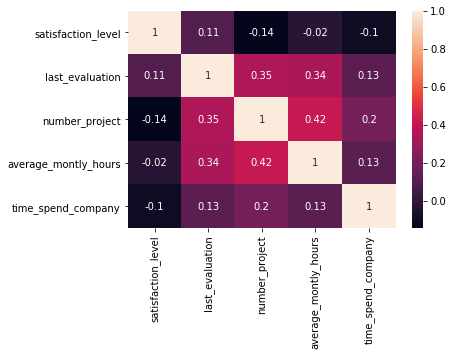

In [8]:
sns.heatmap(df_corr.corr(), annot=True)

- Наиболее скоррелированные переменные это **average_monthly_hours и number_projects**. Между ними прямая зависимость, т.е. чем чаще сотрудник остается в среднем на рабочем месте дольше,тем больше количество у него выполненных проектов.
- Наименее скореелированные **satisfaction_level и average_monthly_hours**. Нет никакой зависимости между уровенем удовлетворенности сотрудником и его средним временем в месяц на рабочем месте

In [9]:
# 4. Рассчитайте сколько сотрудников работает в каждом департаменте
df_hr['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [10]:
# 5. Показать распределение сотрудников по зарплатам
df_hr['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [11]:
# 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
df_hr.groupby('department').salary.value_counts()

department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   high       225
             medium     225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: salary, dtype: int64

In [12]:
# 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

# H0: Сотрудники с высоким и низким окладом проводят на работе одинаковое количество времени
# H1: Сотрудники с высоким и низким окладом проводят на работе разное количество времени
# Уровень значимости примем: 0.05

In [13]:
from scipy import stats as st

In [14]:
alpha = 0.05
result = st.ttest_ind(df_hr[df_hr['salary'] == 'high']['average_montly_hours'], df_hr[df_hr['salary'] == 'low']['average_montly_hours'], equal_var=False)
print(result)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Сотрудники с высоким и низким окладом проводят на работе разное количество времени ')
else:
    print('Не можем отвергнуть нулевую гипотезу. Сотрудники с высоким и низким окладом проводят на работе одинаковое количество времени')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не можем отвергнуть нулевую гипотезу. Сотрудники с высоким и низким окладом проводят на работе одинаковое количество времени


При чем statistic=-0.76 говорит о том, что сотрудники с выким окладом в среднем проводят все-таки чуть-чуть меньше времени на работе, хотя в целом они проводят примерно одинаковое количество времени на работе

In [15]:
# 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
# ●Доля сотрудников с повышением за последние 5 лет ●Средняя степень удовлетворенности ●Среднее количество проектов

df_left = df_hr[ df_hr['left']==1 ] # выборка с уволившимися сотрудниками
df_not_left = df_hr[ df_hr['left']==0 ] # выборка с не уволившимися сотрудниками

In [16]:
# Расчеты по уволившимся сотрудникам:
print(f'Доля уволившихся сотрудников с повышением за последние 5 лет: {round(df_left[ df_left.promotion_last_5years==1 ].promotion_last_5years.count()/len(df_left)*100,2)}%')
print(f'Средняя степень удовлетворенности уволившихся сотрудников: {df_left.satisfaction_level.mean()}')
print(f'Среднее количество проектов уволившихся сотрудников: {df_left.number_project.mean()}')

Доля уволившихся сотрудников с повышением за последние 5 лет: 0.53%
Средняя степень удовлетворенности уволившихся сотрудников: 0.44009801176140917
Среднее количество проектов уволившихся сотрудников: 3.8555026603192384


In [17]:
# Расчеты по не уволившимся сотрудникам:
print(f'Доля не уволившихся сотрудников с повышением за последние 5 лет: {round(df_not_left[ df_not_left.promotion_last_5years==1 ].promotion_last_5years.count()/len(df_not_left)*100,2)}%')
print(f'Средняя степень удовлетворенности не уволившихся сотрудников: {df_not_left.satisfaction_level.mean()}')
print(f'Среднее количество проектов не уволившихся сотрудников: {df_not_left.number_project.mean()}')

Доля не уволившихся сотрудников с повышением за последние 5 лет: 2.63%
Средняя степень удовлетворенности не уволившихся сотрудников: 0.666809590479516
Среднее количество проектов не уволившихся сотрудников: 3.786664333216661


In [18]:
# 9. Разделить данные на тестовую и обучающую выборки. 
# Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department иsalary) 
# Оценить качество модели на тестовой выборке

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [19]:
df_lda = df_hr.drop(['department', 'salary'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(df_lda, df_lda['left'], test_size=0.25)
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [20]:
y_pred = lda.predict(x_test) # прогноз
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
accuracy_score(y_test, y_pred) # точность прогноза модели

0.7618666666666667

In [22]:
confusion_matrix(y_test, y_pred)

array([[2607,  229],
       [ 664,  250]], dtype=int64)

Точность предсказания модели 76%, что на мой взгляд является низким показателем и характерезует модель как некачественную.

In [23]:
result = pd.DataFrame([y_test.values,y_pred]).T # сравнение тестовых значений с предсказанием
result

,0,1
0,0,0
1,1,0
2,1,0
3,1,0
4,0,0
...,...,...
3745,1,0
3746,0,0
3747,0,0
3748,0,0
